# CS 109A/AC 209A/STAT 121A Data Science: Homework 3
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>
**Due Date: ** Wednesday, September 28th, 2016 at 11:59pm

Download the `IPython` notebook as well as the data file from Vocareum and complete locally.

To submit your assignment, in Vocareum, upload (using the 'Upload' button on your Jupyter Dashboard) your solution to Vocareum as a single notebook with following file name format:

`last_first_CourseNumber_HW3.ipynb`

where `CourseNumber` is the course in which you're enrolled (CS 109a, Stats 121a, AC 209a). Submit your assignment in Vocareum using the 'Submit' button.

**Avoid editing your file in Vocareum after uploading. If you need to make a change in a solution. Delete your old solution file from Vocareum and upload a new solution. Click submit only ONCE after verifying that you have uploaded the correct file. The assignment will CLOSE after you click the submit button.**

Problems on homework assignments are equally weighted. The Challenge Question is required for AC 209A students and optional for all others. Student who complete the Challenge Problem as optional extra credit will receive +0.5% towards your final grade for each correct solution. 

Import libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression as Lin_Reg
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import scipy as sp
%matplotlib inline

In [2]:
import statsmodels.api as sm
from sklearn.cross_validation import train_test_split as sk_split
from datetime import datetime


## Problem 0: Basic Information

Fill in your basic information. 

### Part (a): Your name

Galvin, Owen

### Part (b): Course Number

CS 109a Extension

### Part (c): Who did you work with?

None

**All data sets can be found in the ``datasets`` folder and are in comma separated value (CSV) format**

## Problem 1: Multiple linear regression

### Part (a): Implement multiple linear regression from scratch

You are provided a data set containing attributes related to automobiles as well as their corresponding prices. The task is to build a linear regression model from scratch that can estimate the price of an automobile (response variable) using its attributes (predictor variables).

The file ``dataset_1_train.txt`` contains the training set that you can use to fit a regression model, and the file ``dataset_1_test.txt`` contains the test set that you can use to evaluate the model. In each file, the first two columns contain the predictors of the automobile, namely ``'horsepower'`` and ``'highway MPG'``, and the last column contains the automobile prices.

- Implement the following two functions from scratch. 

    - ``multiple_linear_regression_fit``:

        - takes as input: the training set, ``x_train``, ``y_train``

        - fits a multiple linear regression model

        - returns the model parameters (coefficients on the predictors, as an array, and the intercept, as a float).

    - ``multiple_linear_regression_score``:

        - takes model parameters (coefficients and intercept) and the test set, ``x_test`` ``y_test``, as inputs

        - returns the R^2 score for the model on the test set, along with the predicted y-values.
        
- Use your functions to predict automobile prices and evaluate your predictions.

**Note:** You **may not** use pre-built models or model evaluators for these tasks.

## <font color='blue'>Solution, Part(a):</font>

In [3]:
# multiple_linear_regression_fit:
#   takes as input: the training set, x_train, y_train
#   fits a multiple linear regression model
#   returns the model parameters (coefficients on the predictors, as an array, and the intercept, as a float).

# From lab3 Solutions, with some minor variable renaming


### Functions for fitting and evaluating multiple linear regression

#--------  multiple_linear_regression_fit
# A function for fitting a multiple linear regression
# Fitted model: f(x) = x.w + c
# Input: 
#      x_train (n x d array of predictors in training data)
#      y_train (n x 1 array of response variable vals in training data)
# Return: 
#      w (d x 1 array of coefficients) 
#      c (float representing intercept)

def multiple_linear_regression_fit(x_train, y_train):
    
    # Append a column of one's to x
    n = x_train.shape[0]
    ones_col = np.ones((n, 1))
    x_train = np.concatenate((x_train, ones_col), axis=1)
    
    # Compute transpose of x
    x_transpose = np.transpose(x_train)
    
    # Compute coefficients: w = inv(x^T * x) x^T * y
    # Compute intermediate term: inv(x^T * x)
    # Note: We have to take pseudo-inverse (pinv), just in case x^T * x is not invertible 
    x_t_x_inv = np.linalg.pinv(np.dot(x_transpose, x_train))
    
    # Compute w: inter_term * x^T * y 
    w = np.dot(np.dot(x_t_x_inv, x_transpose), y_train)
    coeffs = w[:-1]
    
    # Obtain intercept: 'c' (last index)
    c = w[-1]
    
    return coeffs, c



In [4]:
# multiple_linear_regression_score:
#   takes model parameters (coefficients and intercept) and the test set, x_test y_test, as inputs
#   returns the R^2 score for the model on the test set, along with the predicted y-values.

#from Lab3 Solutions + minor annotations


#--------  multiple_linear_regression_score
# A function for evaluating R^2 score and MSE 
# of the linear regression model on a data set
# Input: 
#      w (d x 1 array of coefficients)
#      c (float representing intercept)
#      x_test (n x d array of predictors in testing data)
#      y_test (n x 1 array of response variable vals in testing data)
# Return: 
#      r_squared (float) 
#      y_pred (n x 1 array of predicted y-vals)

def multiple_linear_regression_score(w, c, x_test, y_test):
    
    # Compute predicted labels
    y_pred = np.dot(x_test, w) + c
    
    # RSS aka Residual Sum of Squares
    # Evaluate sqaured error, against target labels
    # sq_error = \sum_i (y[i] - y_pred[i])^2
    sq_error = np.sum(np.square(y_test - y_pred))
    
    # TSS aka Total Sum of Squares
    # Evaluate squared error for a predicting the mean value, against target labels
    # variance = \sum_i (y[i] - y_mean)^2
    y_mean = np.mean(y_test)
    y_variance = np.sum(np.square(y_test - y_mean))
    
    # Evaluate R^2 score value
    r_squared = 1 - sq_error / y_variance

    return r_squared, y_pred

In [5]:
#from Lab3 Solutions, split and prep the train/test datasets, print some summary info

# Load train and test data sets
data_train = np.loadtxt('datasets/dataset_1_train.txt', delimiter=',', skiprows=1)
data_test = np.loadtxt('datasets/dataset_1_test.txt', delimiter=',', skiprows=1)

# Split predictors from response
# Training
y_train = data_train[:, -1]
x_train = data_train[:, :-1]

# Testing
y_test = data_test[:, -1]
x_test = data_test[:, :-1]

# summary info, to get an idea of what we are dealing with and make sure train vs. test numbers make sense
total_len = (len(x_train) + len(x_test)) * 1.0
print '{0} observations in train, {1:.2f}% of total data'.format(len(x_train), len(x_train)/total_len * 100)
print '{0} observations in test, {1:.2f}% of total data'.format(len(x_test), len(x_test)/total_len * 100)


137 observations in train, 66.83% of total data
68 observations in test, 33.17% of total data


In [6]:
# Use your functions to predict automobile prices and evaluate your predictions.

# Fit multiple linear regression model, using training set
w, c = multiple_linear_regression_fit(x_train, y_train)

# Evaluate model, using test set
r_squared, pred = multiple_linear_regression_score(w, c, x_test, y_test)

# begin a dataframe with predictor variables from test
df = pd.DataFrame(x_test, columns=['horsepower', 'highway MPG'])
# add the actual and predicted prices to dataframe, as their current datatype
df['actual_price_float'] = y_test
df['pred_price_float'] = pred

# for display, format both predicted and actual price and add those to dataframe
# default values are hard to interpret visually, as the the precision on actual & pred is different
#   and the comma will really help to compare actual vs. predicted
to_currency = np.vectorize(lambda price: '${:,.2f}'.format(price))
pred_currency = to_currency(pred)
actual_currency = to_currency(y_test)
# add the formatted values to dataframe
df['actual price'] = pred_currency 
df['predicted price'] = actual_currency

# certainly want to keep the raw float values but going to only display formatted values
print 
print 'First 10 rows of dataset:'
df[['horsepower', 'highway MPG', 'actual price', 'predicted price' ]].head(10)



First 10 rows of dataset:


,horsepower,highway MPG,actual price,predicted price
0,160,26,"$18,366.99","$18,620.00"
1,69,36,"$10,093.92","$5,118.00"
2,73,31,"$13,185.21","$7,053.00"
3,73,31,"$13,185.21","$7,603.00"
4,82,37,"$9,823.23","$7,126.00"
5,82,33,"$12,215.67","$7,775.00"
6,94,32,"$13,116.02","$9,960.00"
7,82,25,"$17,000.55","$9,233.00"
8,111,29,"$15,338.52","$11,259.00"
9,82,32,"$12,813.78","$7,463.00"


In [7]:
# display R-square values for model
print 'R^2 score on test set:', r_squared
print 'R^2 of around {0:.2f} indicates rather poor model performance, only about {1:.0f}% '.format(
                                                                                        r_squared, r_squared * 100)
print "  of predicted price's variation is covered by this model"

R^2 score on test set: 0.177944627327
R^2 of around 0.18 indicates rather poor model performance, only about 18% 
  of predicted price's variation is covered by this model


### Part (b): Confidence interval on regression parameters
Using your linear regression implementation from Part (a), model the data in ``dataset_2.txt``, which contains five predictor variables in the first five columns, and the response variable in the last column.

Compute confidence intervals for the model parameters you obtain:

- Create 200 random subsamples of the data set of size 100, and use your function to fit a multiple linear regression model to each subsample. 

- For each coefficient on the predictor variables: plot a histogram of the values obtained across the subsamples, and calculate the confidence interval for the coefficients at a confidence level of 95%. 

- Highlight the mean coeffcient values and the end points of the confidence intervals using vertical lines on the histogram plot. How large is the spread of the coefficient values in the histograms, and how tight are the confidence intervals?

- Use the formula for computing confidence intervals provided in class (or use ``statmodels``) to compute the the confidence intervals. Compare confidence intervals you find through simulation to the ones given by the formula (or ``statmodels``), are your results what you would expect?

**Note:** You **may not** use pre-built models or model evaluators for these tasks.

## <font color='blue'>Solution, Part(b):</font>

Linear regression with all predictors


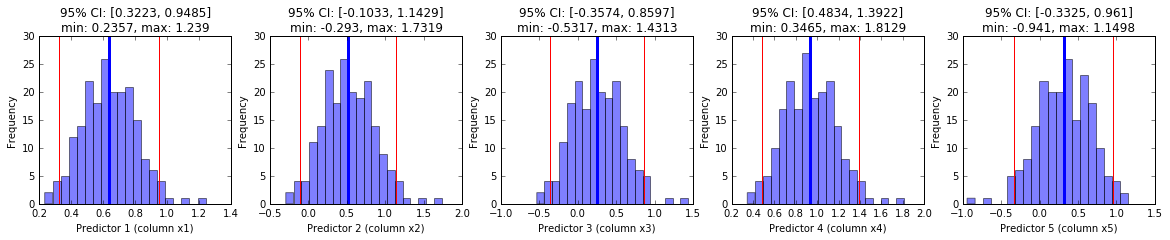

In [8]:
# from lab3 Solution notebook
# increased bin size to 20, thought that with 1000 observations this makes more sense

# Load train set
data = np.loadtxt("datasets/dataset_2.txt", delimiter=',', skiprows = 1)

# Size of data set, and subsample (10%)
x = data[:, :-1]
y = data[:, -1]

# - Create 200 random subsamples of the data set of size 100
# Record size of the data set
n = x.shape[0]
d = x.shape[1]
subsample_size = 100

# No. of subsamples
num_samples = 200
    
### Linear regression with all 5 predictors

# Create a n x d array to store coefficients for 100 subsamples
coefs_multiple = np.zeros((num_samples, d))

print 'Linear regression with all predictors'

# Repeat for 200 subsamples
# - and use your function to fit a multiple linear regression model to each subsample.
for i in range(num_samples):
    # Generate a random subsample of 50 data points
    perm = np.random.permutation(n) # Generate a list of indices 0 to n and permute it
    x_subsample = x[perm[:subsample_size], :] # Get x-vals for the first 50 indices in permuted list
    
    y_subsample = y[perm[:subsample_size]] # Get y-vals for the first 50 indices in permuted list

    # Fit linear regression model on subsample
    w, c = multiple_linear_regression_fit(x_subsample, y_subsample)
    # Store the coefficient for the model we obtain
    coefs_multiple[i, :] = w

# Plot histogram of coefficients, and report their confidence intervals 
fig, axes = plt.subplots(1, d, figsize=(20, 3))

predictor_ci_formula = {}
# Repeat for each coefficient
for j in range(d):
    # Compute mean for the j-th coefficent from subsamples
    coef_j_mean = np.mean(coefs_multiple[:, j])
    # adding in calcs for min/max for j-th coeff
    coef_j_min = np.min(coefs_multiple[:, j])
    coef_j_max = np.max(coefs_multiple[:, j])
    
    # Compute confidence interval at 95% confidence level (use formula!)
    conf_int_left = np.percentile(coefs_multiple[:, j], 2.5)
    conf_int_right = np.percentile(coefs_multiple[:, j], 97.5)
    # add values to my dict so they can be pulled out in next cell for comparison agains statsmodel calc
    predictor_ci_formula[j+1] = (conf_int_left, conf_int_right)
       
    # Plot histogram of coefficient values
    axes[j].hist(coefs_multiple[:, j], alpha=0.5, bins=20)

    # Plot vertical lines at mean and left, right extremes of confidence interval
    axes[j].axvline(x = coef_j_mean, linewidth=3)
    axes[j].axvline(x = conf_int_left, linewidth=1, c='r')
    axes[j].axvline(x = conf_int_right, linewidth=1, c='r')
    
    # Set plot labels
    # add a title that includes spread of coeff values as well as confidence interval values
    title = '95% CI: [{0}, {1}]\nmin: {2}, max: {3}'.format(round(conf_int_left, 4),
                                          round(conf_int_right, 4),
                                         round(coef_j_min, 4),
                                         round(coef_j_max, 4))
    axes[j].set_title(title)
    axes[j].set_xlabel('Predictor {0} (column x{0})'.format(str(j + 1)))
    axes[j].set_ylabel('Frequency')

plt.show()

In [9]:
# - How large is the spread of the coefficient values in the histograms, and how tight are the confidence intervals?
# - Compare confidence intervals you find through simulation to the ones given by the formula (or statmodels)

# ** spread of coefficient values has been included in the title of each histogram, below output includes tightness of CIs

# lab3 code snippet

# Add column of ones to x matrix
x = sm.add_constant(x)

# Create model for linear regression
model = sm.OLS(y, x)
# Fit model
fitted_model = model.fit()
# The confidence intervals for our five coefficients are contained in the last five
# rows of the fitted_model.conf_int() array
conf_int = fitted_model.conf_int()[1:, :]

for j in range(d):
    #print 'the confidence interval for the', j, 'th coefficient: [', conf_int[j][0], ',', conf_int[j][1], ']'
    print 'Confidence Interval for Predictor {}:'.format(j+1)
    # round in display for interpretability
    print '\tstatmodels: \t\t[{0:.4f}, {1:.4f}] range: {2}'.format(conf_int[j][0], 
                                                        conf_int[j][1],
                                                       conf_int[j][1]-conf_int[j][0])
    print '\tsimulation (formula):   [{0:.4f}, {1:.4f}] range: {2}'.format(
                                                        predictor_ci_formula[j+1][0], 
                                                        predictor_ci_formula[j+1][1],
                                                        predictor_ci_formula[j+1][1]-predictor_ci_formula[j+1][0])
    
    print

Confidence Interval for Predictor 1:
	statmodels: 		[0.5528, 0.7504] range: 0.197612457095
	simulation (formula):   [0.3223, 0.9485] range: 0.626285907002

Confidence Interval for Predictor 2:
	statmodels: 		[0.3522, 0.7497] range: 0.397512959779
	simulation (formula):   [-0.1033, 1.1429] range: 1.24616491294

Confidence Interval for Predictor 3:
	statmodels: 		[0.0889, 0.4734] range: 0.384475413654
	simulation (formula):   [-0.3574, 0.8597] range: 1.21713917978

Confidence Interval for Predictor 4:
	statmodels: 		[0.8098, 1.0985] range: 0.288738430541
	simulation (formula):   [0.4834, 1.3922] range: 0.90885880327

Confidence Interval for Predictor 5:
	statmodels: 		[0.0785, 0.4884] range: 0.409890991028
	simulation (formula):   [-0.3325, 0.9610] range: 1.29347960231



#### - Are your results what you would expect?  
The statsmodels have much tighter/narrower 95% confidence intervals, presumably because the mddel was fitted on the full dataset instead of a series of smaller samples (n=100, i.e. 10% of full population). This accords with what I would have expectd.


## Problem 2: Polynomial regression
In this problem, we revisit a dataset from Homework 1 and fit polynomial regression models to it. The dataset is provided in the file ``dataset_3.txt``, which contains a single predictor variable ``x`` in the first column and the response variable ``y`` in the second column. 

### Part(a): Implement polynomial regression from scratch

- Implement the following three functions from scratch:

    - ``polynomial_regression_fit``:
        - takes as input: training set, ``x_train``, ``y_train`` and the degree of the polynomial
        - fits a polynomial regression model 
        - returns the model parameters (array of coefficients and the intercept)

    - ``polynomial_regression_predict``: 
        - takes as input: the model parameters (array of coefficients and the intercept), the degree of the polynomial and the test set predictors ``x_test``
        - returns the response values predicted by the model on the test set. 

    - ``polynomial_regression_score``: 
        - takes an array of predicted response values and the array of true response values ``y_test``
        - returns R^2 score for the model on the test set, as well as the sum of squared errors

- Fit polynomial regression models of degrees 3, 5, 10 and 25 to the data set. Visualize the original data along with the fitted models for the various degrees in the same plot. 

For this problem, you may either use the multiple linear regression functions implemented in the Problem 1 or use the in-built functions in ``sklearn``.

## <font color='blue'>Solution, Part(a):</font>

In [10]:
# polynomial_regression_fit:
#   takes as input: training set, x_train, y_train and the degree of the polynomial
#   fits a polynomial regression model
#   returns the model parameters (array of coefficients and the intercept)


# from Lecture 5 notebook, with additional annotations
# instructor comment in Piazza indicated it was fine to use sm.OLS here

# --- polynomial_regression_fit:
# Fits a polynomial regression model
# using OLS module of sklearn
# Input: 
#    x_train, n x d array of coefficients 
#    y_train, n x 1 array of dependent variables
#    degree of the polynomial (integer)
# Return:
#   the model parameters (array of coefficients and the intercept)

def polynomial_regression_fit(x, y, degrees):
    
    # Create the poly terms for x,x^2 ..    
    n= np.size(y)   # data size 
    x_poly = np.zeros([n, degrees]) # poly degree 

    for d in range(1, degrees +1):
        x_poly[:, d - 1] = np.power(x, d)  # adding terms 

    Xt=sm.add_constant(x_poly)
    model=sm.OLS(y,Xt)
    model_results=model.fit()
    
    return model_results, Xt


In [11]:
# polynomial_regression_predict:
#   takes as input: the model parameters (array of coefficients and the intercept), 
#     the degree of the polynomial and the test set predictors x_test
#   returns the response values predicted by the model on the test set.

# from Lecture 5 notebook, with additional annotations

# --- polynomial_regression_predict:
# Return predictions based on model, polynomial degree, and test data
# Input: 
#    1 x d array of coefficients and the intercept 
#    degree of the polynomial (integer)
#    n x d array of test predictors
# Return:
#   returns n x 1 array of predicted values

def polynomial_regression_predict(params, degrees, x):

    # # Create the poly terms for x,x^2 ..
    n = x.shape[0]
    x_poly = np.zeros([n, degrees])
    for d in range(1, degrees + 1):
        x_poly[:, d - 1] = np.power(x, d)
    Xt=sm.add_constant(x_poly)
   
    # Predict y-vals
    y_pred = np.dot(params,Xt.T)
        
    return y_pred

In [12]:
# polynomial_regression_score:
#   takes an array of predicted response values and the array of true response values y_test
#   returns R^2 score for the model on the test set, as well as the sum of squared errors

def polynomial_regression_score(y_pred, y_actual):
    
    rss = np.sum((y_actual-y_pred)**2)
    y_mean_actual = np.mean(y_actual)
    tss = np.sum((y_actual-y_mean_actual)**2)
    r_squared = 1.0 - (rss/tss)
    
    return r_squared
    

In [13]:
# based off of plotit1() function from Lecture5 notebook, with modifications

def plot_models(X_test, Y_test, degree_values):

    plt.figure(figsize=(12, 9)) 
    for i, degree_value in enumerate(degree_values):
        model_results, x_poly = polynomial_regression_fit(X_test, Y_test, degree_value)
        y_hat=np.dot(model_results.params, x_poly.T)
        #make up some colors, named colors would have been easy for 4 datapoints
        # below isn't great color picking but is at least a little more flexible
        color_factor = (i+1.0)/len(degree_values)
        line_color = (i % 2, 1-color_factor, color_factor)
        plt.plot(X_test, y_hat, color=line_color, alpha=0.8, label='poly '+str(degree_value) + ' degree')

    plt.plot(X_test, Y_test, 'ro')
    plt.xlabel('X'); plt.ylabel('Y')
    plt.legend(loc='best')    

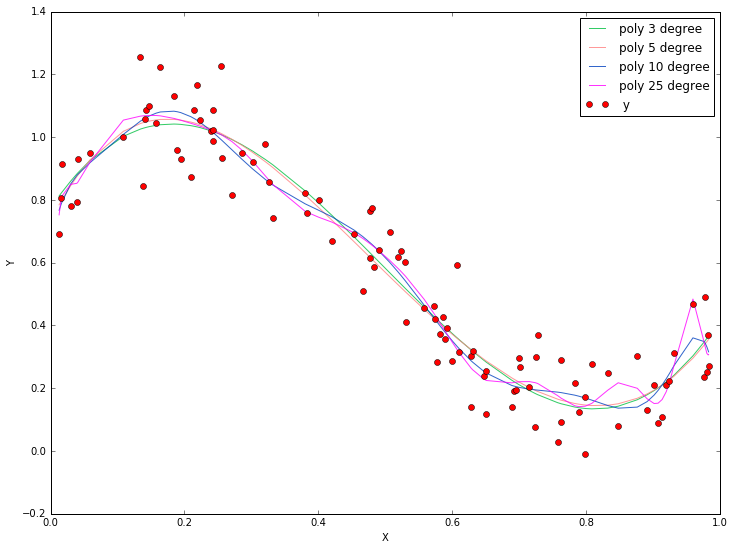

In [14]:
# Fit polynomial regression models of degrees 3, 5, 10 and 25 to the data set. 
# Visualize the original data along with the fitted models for the various degrees in the same plot.

data = pd.read_csv('datasets/dataset_3.txt')
data = data.sort('x')
X_data = data['x']
Y_data = data[' y'] # header has a space after comma


degrees = [3, 5, 10, 25]
plot_models(X_data, Y_data, degrees)

###  Part (b): Comparing training and test errors

- Split the data set in Problem 2 each into training and test sets: use the first 50% of the data for training and the remaining for testing. 


- Fit polynomial models of varying degree ranging from 1 to 15 to the training sets. Evaluate  the various fits on **both** the training and the test sets. Plot both the R^2 score of the fitted polynomial models on the training and test sets as a functions of the degree. 


- Describe the relationship between degree of the polynomial model and the fit on both the training and testing data. Explain, based on the plot, what is the best polynomial model for the data.

## <font color='blue'>Solution, Part(b):</font>

In [15]:
# my split from Homework 2
def split(df, m):
    
    #seed was helpful during testing, don't see any real reason to remove
    #ran some tests later and the r-squared output by 109 seed was generally in the middle
    # of the various r-squared reported by both knn & LR when the seed was removed
    np.random.seed(109)
    train_rows = np.random.choice(df.index.values, int(len(df.index)*(m/100.0)), replace=False)
    train_df = df.ix[train_rows]
    test_df = df.drop(train_df.index)
    
    return train_df, test_df


In [16]:
# - Split the data set in Problem 2 each into training and test sets: 
#    use the first 50% of the data for training and the remaining for testing.

# reading in again for safety, small dataset anyway
data = pd.read_csv('datasets/dataset_3.txt')
# get rid of space in y column name
data = data.rename(columns = {' y': 'y'})
data = data.sort('x')
train_df, test_df = split(data, 50)
print '{0} rows in dataset, {1} in train and {2} in test'.format(len(data), len(train_df), len(test_df))




100 rows in dataset, 50 in train and 50 in test


In [17]:
# - Fit polynomial models of varying degree ranging from 1 to 15 to the training sets. 
# - Evaluate the various fits on both the training and the test sets. 


use_regular_dataset = True
if use_regular_dataset:
    train_x_df, train_y_df = train_df['x'], train_df['y']
    test_x_df, test_y_df = test_df['x'], test_df['y']
else:
    # stick in datasets from lect 5 for visual comparison to Lect 5 results
    #   in part had been surprised by negative R^2 values, so wanted to make sure I didn't mess up
    data = pd.read_csv('datasets\Lect5_poly1_train.csv')
    data = data.sort('X')
    train_x_df, train_y_df = data['X'], data['Y']
    data = pd.read_csv('datasets\Lect5_poly1_test.csv')
    data = data.sort('X')
    test_x_df, test_y_df = data['X'], data['Y']

# below adapted from Lecture 5 code snippet, changes mostly involve variable names
degrees=15
R2_train = np.zeros([degrees+1, 1])
R2_test = np.zeros([degrees+1, 1])
# going to store the trained models for later use
trained_models = {}

for d in range(1, degrees +1):
    # train the model on training set
    train_model_results, _ = polynomial_regression_fit(train_x_df, train_y_df, d)
    #don't need x_poly..trained_models[d] = {'model': train_model_results, 'x_poly': x_poly}
    trained_models[d] = train_model_results
    R2_train[d] = train_model_results.rsquared
        
    # use trained model on the test data
    y_hat = polynomial_regression_predict(train_model_results.params, d, test_x_df)
    test_rss = np.sum((test_y_df - y_hat)**2)
    test_tss = np.sum((test_y_df - np.mean(test_y_df))**2)
    R2_test[d] = 1.0 - test_rss/test_tss
    
    # print d, R2_train[d], R2_test[d]


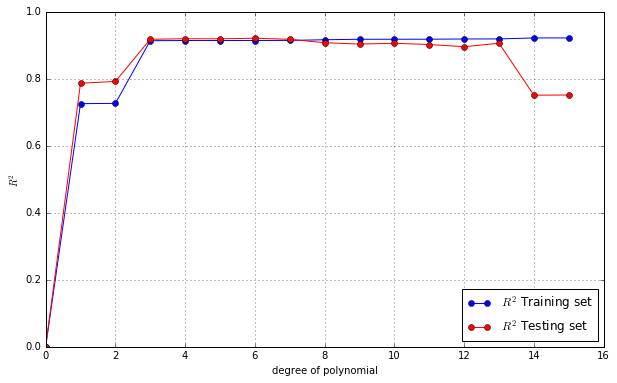

In [18]:
# - Plot both the R^2 score of the fitted polynomial models on the training and test sets as a functions of the degree.

#lec5 code snippet

plt.figure(figsize=(10,6))
plt.plot(R2_train, 'bo-', label=r'$R^2$ Training set')
plt.plot(R2_test, 'ro-', label=r'$R^2$ Testing set')
plt.xlabel('degree of polynomial')
plt.ylabel(r'$R^2$')
plt.xlabel('degree of polynomial')
plt.ylabel(r'$R^2$')
plt.legend(loc='best')
plt.grid()

#### Describe the relationship between degree of the polynomial model and the fit on both the training and testing data.  Explain, based on the plot, what is the best polynomial model for the data.  

R<sup>2</sup> climbs rapidly for both train and tst in the beginning, where beginning with polynomial degree = 3, we get an R<sup>2</sup> for both that is quite high, somewhere around .91. From there they generally track until beginning to diverge around degree = 8, at which point the Testing set begins to register a lower R<sup>2</sup>. Testing R<sup>2</sup> continues to decrease slightly before bumping up a bit at degree = 13. After that a steep decrease and a flattening out (including degrees 15 through 20 shows some rather negative R<sup>2</sup> values on Testing). A different test/train split should produce similar results, though of course the details will be different.

Taking only R<sup>2</sup> values into account, a polynomial degree of 3 might be appropriate, after that only getting minor changes in R<sup>2</sup>, which might not even be improvements. Could look at the raw values but the differences at this precision would likely vary between samples. Would of course want to run more (different) samples through the algorithms and see those results. Even if there is a consistent gradual improvement along degree values of 3 to 7 or so, any increased values must be justified against increased model complexity and computing time.

See below for an attemp to visualize the models created by 3/5/15 polynomial degrees vs. the actual data. I haven't had time to re-check the code but didn't want to flat out delete it.


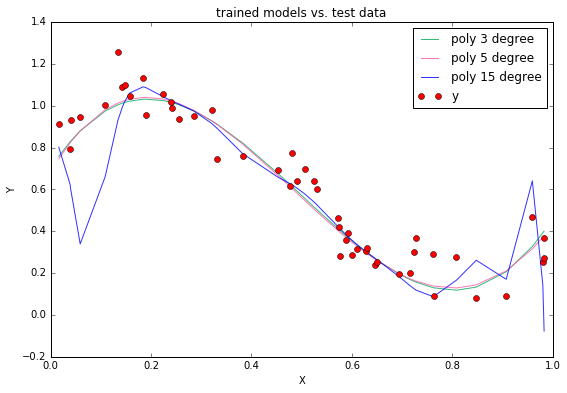

In [19]:
# want to try plotting the test data fitted on training model results
# idea is that you can visualize why R^2 for polynomial 15 is bad (for test set)

degree_values = [3, 5, 15]
plt.figure(figsize=(9, 6)) 
for i, degree_value in enumerate(degree_values): # range(1, degrees +1):
    
    model_results = trained_models[degree_value] 
    y_hat = polynomial_regression_predict(model_results.params, degree_value, test_x_df)

    #make up some colors, named colors would have been easy for 4 datapoints
    # below isn't great color picking but is at least a little more flexible
    color_factor = (i+1.0)/len(degree_values)
    line_color = (i % 2, 1-color_factor, color_factor)
    plt.plot(test_x_df, y_hat, color=line_color, alpha=0.8, label='poly '+str(degree_value) + ' degree')

plt.plot(test_x_df, test_y_df, 'ro')
plt.xlabel('X'); plt.ylabel('Y')
plt.legend(loc='best') 
plt.title('trained models vs. test data')
    


## Problem 3: Model selection criterion
In this problem, we examine various criteria that help us decide how to choose between multiple models for the same data.

###  Part (a): How does one choose the best polynomial degree?
In Problem 2, you fitted polynomials of different degrees to the entire data set, and inspected the quality of fits on the test set. In practice, one needs to find the 'best' model for the given prediction task using **only** the training set. For this, we'll now make use of two model selection criteria, namely, the Akaike Information Criterion (AIC) and the Bayesian Information Criterion (BIC). These are evaluated on the training set, but serve as a proxy for the test set accuracy.

For ``dataset_3.txt``, do the following:

- For each polynomial model you fitted, compute the AIC and BIC for the model on the training set. Plot the criterion values as a function of the polynomial degree.


- Which model is chosen by each criterion? Do they match with the model that yields maximum test R^2 score?

## <font color='blue'>Solution, Part(a):</font>

In [20]:
# For each polynomial model you fitted, compute the AIC and BIC for the model on the training set. 
# per prof: use the 1-15 range: Q2 (b) / with training dataset and polynomial from degrees 1 to 15

# basically the method used in Lec 5 code
degrees = 15
AIC = np.zeros([degrees+1,1])
BIC = np.zeros([degrees+1,1])

for d in range(1, degrees):
    # I had made a dictionary of models based on training data/degree combinations earlier
    #  for purposes of testing. Pull those out, where the key = polynomial degree value
    model = trained_models[d]
    AIC[d] = model.aic
    BIC[d] = model.bic
    

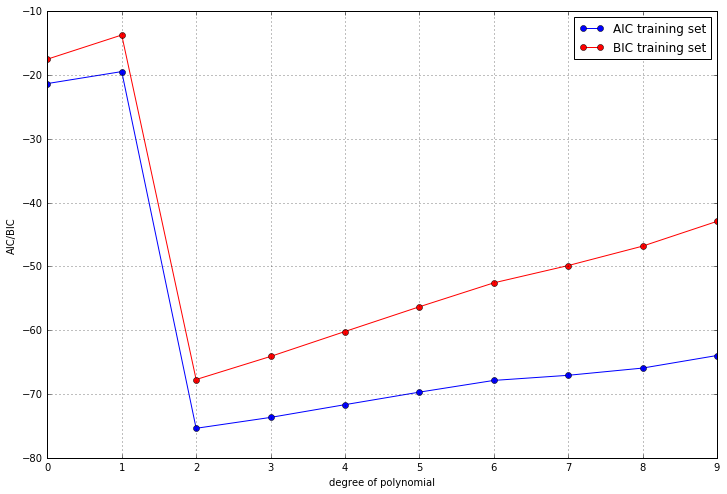

In [21]:
# Plot the criterion values as a function of the polynomial degree.

# code snippet from Lec 5 notebook
plt.figure(figsize=(12,8))
plt.plot(AIC[1:11], 'bo-', label=r'AIC training set')
plt.plot(BIC[1:11], 'ro-', label=r'BIC training set')

plt.xlabel('degree of polynomial'); 
plt.ylabel(r'AIC/BIC')
plt.legend(loc='best')
plt.grid()

#### Which model is chosen by each criterion? 
#### Do they match with the model that yields maximum test R<sup>2</sup> score?

For both AIC & BIC we want the lowest value. For this set of models that happens at degree of polynomial = 2. 
In the earlier R<sup>2</sup> plot, it seemed that degree = 3 represented the best tradeoff of R<sup>2</sup> vs. complexity. Jumping back up to that plot, the increase in R<sup>2</sup> going from degrees 2 to 3 is likely large enough to compensate for the increase in AIC/BIC that occurs at the same interval. I would want to calculate Adjusted R<sup>2</sup> for same models (and learn more about the details of AIC & BIC) for a final determination.

### Part (b): Application to New York taxi cab density estimation

We shall now apply the concepts learned so far to a real-world prediction task. You are asked to build a regression model for estimating the density of Green cab taxis at any given time of a day in New York city. The model needs to take the time of the day (in minutes) as input, and predict the expected number of pick ups at that time.

The data set for this problem can be downloaded from the following URL: https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-01.csv. The file contains the details of all pickups by Green cabs in New York City during January 2015. 

## <font color='blue'>Solution, Part(b):</font>

In [22]:
#  trailing comma's on each line (all lines) will munge the column names, fix below
data = pd.read_csv('datasets/green_tripdata_2015-01.csv')

print len(data) # 1,508,501 rows

# index_col=False should be the fix for trailing comma's in the csv's rows
#   but that blows up in this version of pandas = 0.15.2, try a workaround

#get the true column names into a single string, in a 1 item array
csv_columns = pd.read_table('datasets/green_tripdata_2015-01.csv', nrows=1, sep='|').columns.values
# pull out the string and properly split on the comma delimiter
data_columns = csv_columns[0].split(',') 
# VendorID & lpep_pickup_datetime had been combined into index, pull them out as generic columns
data.reset_index(level=[0, 1], inplace=True)
# finally, set all the columns to the true 21 item list + two placeholder columns for the trailing commas
data.columns = csv_columns[0].split(',') + ['dummy1', 'dummy2']

# display first few rows, visually confirm that it worked ok
data.head()


1508501


,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,dummy1,dummy2
0,2,2015-01-01 00:34:42,2015-01-01 00:38:34,N,1,-73.922592,40.754528,-73.913635,40.765522,1,...,0.5,0.0,0,NaN,0.3,6.3,2,1,NaN,NaN
1,2,2015-01-01 00:34:46,2015-01-01 00:47:23,N,1,-73.952751,40.677711,-73.981529,40.658978,1,...,0.5,0.0,0,NaN,0.3,13.3,2,1,NaN,NaN
2,1,2015-01-01 00:34:44,2015-01-01 00:38:15,N,1,-73.843010,40.719055,-73.846581,40.711567,1,...,0.5,1.8,0,NaN,0.0,7.8,1,1,NaN,NaN
3,2,2015-01-01 00:34:48,2015-01-01 00:38:08,N,1,-73.860825,40.757793,-73.854042,40.749821,1,...,0.5,0.0,0,NaN,0.3,6.3,2,1,NaN,NaN
4,2,2015-01-01 00:34:53,2015-01-01 01:09:10,N,1,-73.945183,40.783321,-73.989624,40.765450,1,...,0.5,0.0,0,NaN,0.3,25.8,2,1,NaN,NaN


In [23]:
# helper function, thought about rounding the minute + seconds value to nearest minute
#  but I believe simply extracting the minute is reasonable, i.e. counts will represent trips that 
#  began during 'this' minute.
def extract_minutes(val):
    as_datetime = datetime.strptime(val, '%Y-%m-%d %H:%M:%S')
    # calc the number of minutes that have passed in a day for this time value
    minutes = (as_datetime.hour * 60) + as_datetime.minute
    
    return minutes

# for later display of the results, though will also add formatted value to orig dataframe for QA
#  basically taking the total minutes values and formatting in AM/PM format that would be relevant
#  for audience - I am assuming U.S. readers, since data is from NYC
def minutes_to_time(total_minutes):
    hours = total_minutes/60
    hour_display = '{0}'.format(hours if hours > 0 and hours < 13 else abs(hours - 12))
    minutes = total_minutes%60
    
    return '{0}:{1:02d} {2}.m.'.format(hour_display, minutes, 'a' if hours < 12 else 'p')

# add a new column to dataframe representing the minute of the day, e.g. 1:30 am should be 90
data['minute'] = data['lpep_pickup_datetime'].apply(lambda val: extract_minutes(val))

print 'done'
# this is more for qa - I'm going to back-engineer the minute value above into a more user-friendly value
#  do it here to QA results of my function... and comment it out entirely since it will only add to HW processing time
# data['back_to_time'] = data['minute'].apply(lambda m: minutes_to_time(m))
# data[(data['minute'] > 60*24-45) & (data['minute'] < 60*24)][['lpep_pickup_datetime','back_to_time','minute']]


done


In [24]:
# 50/50 split so that the same number of observations are in each, will be 
#   aggregating results into density counts, probablyl a better mathematical
#   way of approaching this...
train_srs, test_srs = split(data['minute'], 50)

# do a group by on the minute values, which will be persisted in train_count as the index values
#   actual counts can be pulled out via .values
train_count = train_srs.groupby(train_srs.values).count()
x_train = train_count.index
y_train = train_count.values
# repeat for test
test_count = test_srs.groupby(test_srs.values).count()
x_test = test_count.index
y_test = test_count.values

# reshape to structure expected by multiple_linear_regression_fit
x_train_reshape = np.reshape(x_train, (-1, 1))
x_test_reshape = np.reshape(x_test, (-1, 1))

# fit the model
w, c = multiple_linear_regression_fit(x_train_reshape, y_train)
# evaluate model
r_squared, pred = multiple_linear_regression_score(w, c, x_test_reshape, y_test)

#print w, c
print 'R^2 value: {}'.format(r_squared)

# build up a dataframe with the columns in the order I want them to be in
pred_df = pd.DataFrame({'minute': x_test})
pred_df['time_of_day'] = pred_df['minute'].apply(lambda m: minutes_to_time(m))
pred_df['count_actual'] = y_test
# numbers are big enough it best to round to whole value, not much being lost for display
pred_df['count_predicted'] = np.round(pred, 0)

pred_df.sort('minute', inplace=True)
pred_df.head()


R^2 value: 0.576619862938


,minute,time_of_day,count_actual,count_predicted
0,0,12:00 a.m.,612,262
1,1,12:01 a.m.,632,263
2,2,12:02 a.m.,551,263
3,3,12:03 a.m.,627,264
4,4,12:04 a.m.,598,264


In [25]:
print 'minimum count_predicted: {}'.format(min(pred_df['count_predicted']))
print 'minimum count_actual: {}'.format(min(pred_df['count_actual']))
print
print 'maximum count_predicted: {}'.format(max(pred_df['count_predicted']))
print 'maximum count_actual: {}'.format(max(pred_df['count_actual']))

minimum count_predicted: 262.0
minimum count_actual: 110

maximum count_predicted: 785.0
maximum count_actual: 905


### <font color='red'>OK, everything looks moderately horrible</font>
In a rush to get everything in the HW completed in at least a draft format I failed to think about some of the main points in last week's lectures. But really the key lesson to take to heart is to visualize the data as one of the first acts of assessing a dataset, so I'll do that next.


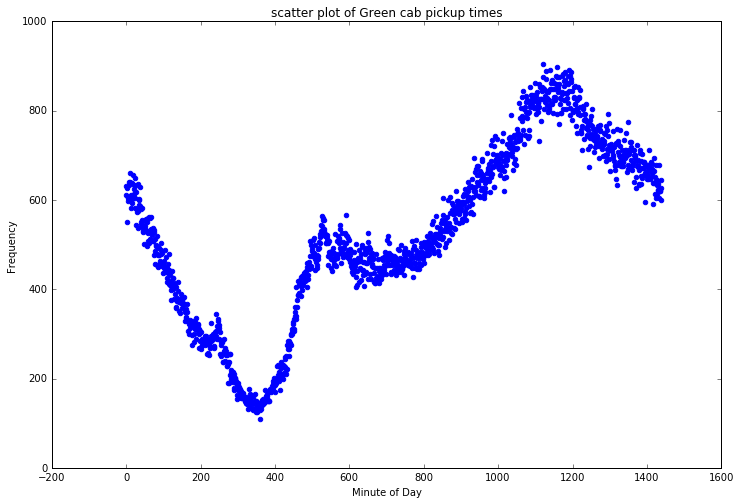

In [26]:
fig = plt.figure(figsize=(12,8))
axes_1 = fig.add_subplot(1, 1, 1)

axes_1.scatter(x_test, 
            y_test, 
            color='blue')
axes_1.set_title('scatter plot of Green cab pickup times')
axes_1.set_xlabel('Minute of Day')
axes_1.set_ylabel('Frequency')

plt.show()

#### I don't think a straight line via standard linear regression model is going to work too well here at all.

In [27]:
# try a polynomial fit, for multiple degree levels, from 1 to 15
# ... several of the following code pieces are from my 2b) solution set

# below adapted from Lecture 5 code snippet, changes mostly involve variable names
degrees=15
R2_train = np.zeros([degrees+1, 1])
R2_test = np.zeros([degrees+1, 1])
# going to store the trained models for later use
trained_models = {}

for d in range(1, degrees +1):
    train_model_results, _ = polynomial_regression_fit(x_train, y_train, d)
    #don't need x_poly..trained_models[d] = {'model': train_model_results, 'x_poly': x_poly}
    trained_models[d] = train_model_results
    R2_train[d] = train_model_results.rsquared

    # use trained model on the test data
    y_hat = polynomial_regression_predict(train_model_results.params, d, x_test)
    test_rss = np.sum((y_test - y_hat)**2)
    test_tss = np.sum((y_test - np.mean(y_test))**2)
    R2_test[d] = 1.0 - test_rss/test_tss




R^2 peaks at around either 3 or 4 degrees


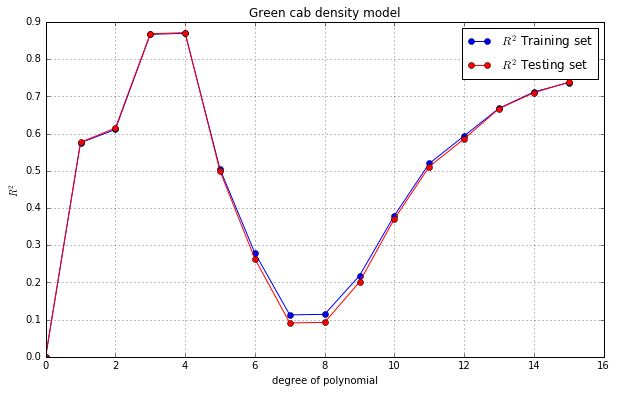

In [28]:
# - Plot both the R^2 score of the fitted polynomial models on the training and test sets as a functions of the degree.

#lec5 code snippet
print
print 'R^2 peaks at around either 3 or 4 degrees'

plt.figure(figsize=(10,6))
plt.plot(R2_train, 'bo-', label=r'$R^2$ Training set')
plt.plot(R2_test, 'ro-', label=r'$R^2$ Testing set')
plt.xlabel('degree of polynomial')
plt.ylabel(r'$R^2$')
plt.xlabel('degree of polynomial')
plt.ylabel(r'$R^2$')
plt.title('Green cab density model')
plt.legend(loc='best')
plt.grid()

In [29]:
# compute AIC & BIC for each model

# basically the method used in Lec 5 code
degrees = 15
AIC = np.zeros([degrees+1,1])
BIC = np.zeros([degrees+1,1])

for d in range(1, degrees):
    # as in earlier problem I had made a dictionary of models based on training data/degree combinations earlier
    #  for purposes of testing. Pull those out, where the key = polynomial degree value
    model = trained_models[d]
    AIC[d] = model.aic
    BIC[d] = model.bic


AIC & BIC both bottom out at around 2 or 3 degrees


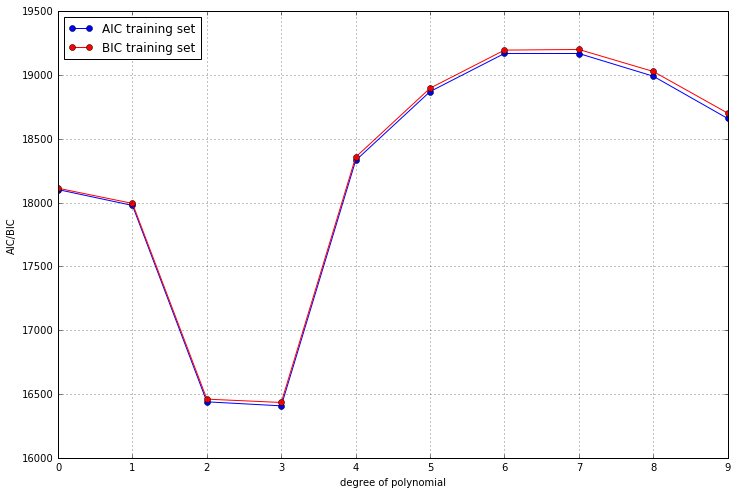

In [30]:
# Plot the criterion values as a function of the polynomial degree.
print
print 'AIC & BIC both bottom out at around 2 or 3 degrees'

# code snippet from Lec 5 notebook
plt.figure(figsize=(12,8))
# example from Lec11 also restricted range of AIC/BIC to display, I'll do the same
#  otherwise I believe graph loses its interperability, certainly don't want the zero'th
#  value as that unecessarily distorts the y range
plt.plot(AIC[1:11], 'bo-', label=r'AIC training set')
plt.plot(BIC[1:11], 'ro-', label=r'BIC training set')

plt.xlabel('degree of polynomial'); 
plt.ylabel(r'AIC/BIC')
plt.legend(loc='best')
plt.grid()

#### Recommendation  
R<super>2</super> evaluation indicated 3 to 4 degrees of polynomial resulted in best model while AIC/BIC calcs recommended a value of either 2 or 3, so I'll go with degrees = 3 as the best model. 

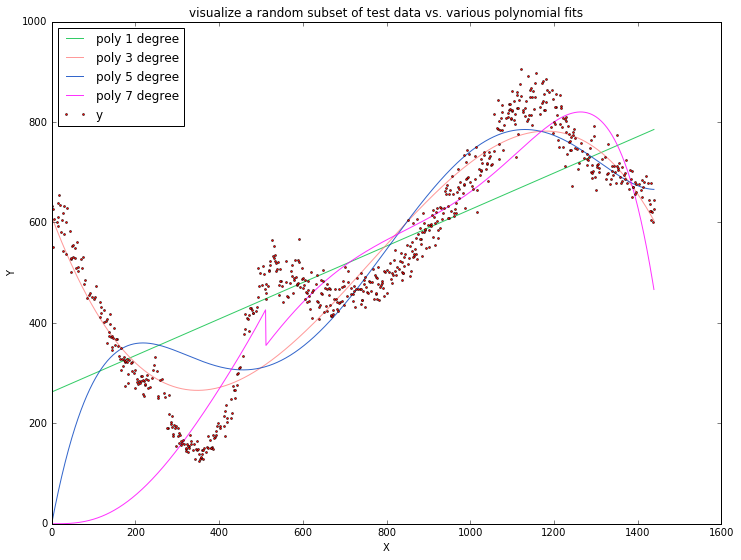

In [31]:
degree_values = [1, 3, 5, 7]
plt.figure(figsize=(12, 9)) 
for i, degree_value in enumerate(degree_values): # range(1, degrees +1):
    
    model_results = trained_models[degree_value] 
    y_hat = polynomial_regression_predict(model_results.params, degree_value, x_test)

    #make up some colors, named colors would have been easy for 4 datapoints
    # below isn't great color picking but is at least a little more flexible
    color_factor = (i+1.0)/len(degree_values)
    line_color = (i % 2, 1-color_factor, color_factor)
    plt.plot(x_test, y_hat, color=line_color, alpha=0.8, label='poly '+str(degree_value) + ' degree')


# to make for a plot where the number of dots don't obscure the polynomial models,
#  hijack my split function to pull out 50% of tatal number, at random
test_xy = pd.DataFrame({'x':x_test, 'y': y_test})
first, second = split(test_xy, 50)
# and also decrease the dot size
plt.plot(first['x'], first['y'], 'ro', markersize=2)
plt.xlabel('X'); 
plt.ylabel('Y')
plt.title('visualize a random subset of test data vs. various polynomial fits')
plt.legend(loc='best')    



In [32]:
#some stats on what appears to be best model going by combo of R^2/AIC/BIC
best_degree = 3
final_model = trained_models[best_degree]
final_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     3111.
Date:                Wed, 28 Sep 2016   Prob (F-statistic):               0.00
Time:                        21:06:32   Log-Likelihood:                -8215.4
No. Observations:                1440   AIC:                         1.644e+04
Df Residuals:                    1436   BIC:                         1.646e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        611.4874      7.653     79.900      0.000       596.475   626.500
x1            -2.2021      0.046    -47.794      0.000        -2.292    -2.112
x2             0.0041   7.44e-05     55.005      0.000         0.004     0.004
x3         -1.784e-06    3.4e-08    -52.472      0.000     -1.85e-06 -1.72e-06
==============================================================================
Omnibus:                       77.044   Durbin-Watson:                   0.195
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.470
Skew:                           0.603   Prob(JB):                     6.15e-20
Kurtosis:                       3.141   Cond. No.                     4.50e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.5e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Challenge Problem: Advanced regression techniques
In this problem, we revisit the automobile pricing data set in Problem 1(a) and explore advanced regression techniques to build better models. 


### Part (a): Polynomial regression on multi-dimensions
In Problems 2-3, you had implemented a polynomial regression technique for data sets with a single predictor variable. How would you use a similar approach to fit a polynomial model on data sets with more than one predictor?

Reload ``dataset_1_train.txt`` and ``dataset_1_test.txt``. Fit polynomial models of degrees 2 and 3 to the training set, and evaluate the R^2 score of the fitted model on the test set. How do they compare with the test performance of a linear regression model?

### Part (b): Weighted linear regression

Suppose you are told that some of the prices recorded in the training set are noisy, and you are given the list of noisy points, how would you use this information during training to fit a better regression model?

The noise level for each training point is provided in the file dataset_1_train_noise_levels.txt. A noise level 'none' indicates that the price is accurate, and a noise level 'noisy' indicates that the price is only moderately accurate. 

We want to fit a linear regression model that accounts for this new information. One way to do this is to assign different weights to each training point based on the amount of noise associated to that training point. That is, our loss function is now
$$
\sum_{i=1}^n \alpha_i\,(y_i \,-\, w^T x_i)^2
$$
where $\alpha_i$ is a number representing how much you value the contribution of the data point $x_i$.

How does the R^2 score (evaluated on the test set) of the new linear model compare to the one fitted using plain linear regression?